In [1]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [2]:
iris_df = pd.read_csv("iris.csv")
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4,4.6,3.1,1.5,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
7,8,5.0,3.4,1.5,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Check if there are any missing values



In [3]:
iris_df.info()
#iris_df.fillna(iris_df[].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_df.ffill(inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [5]:
le = preprocessing.LabelEncoder()
le.fit(iris_df['Species'])
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [6]:
iris_df['Species']=le.transform(iris_df['Species'])

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [8]:
# Create correlation matrix
corr_matrix = iris_df.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than -0.1 and less than 0.1
to_drop = [column for column in upper.columns if any((upper[column] > -0.1) & (upper[column] < 0.1))]

In [9]:
to_drop

[]

In [10]:
# Drop features 
iris_df.drop(iris_df[to_drop], axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [11]:
# Create correlation matrix
var_matrix = pd.DataFrame(iris_df.var()<0.1)
var_matrix
#var_matrix.index[1]
# Select upper triangle of correlation matrix

# Find index of feature columns with correlation greater than -0.1 and less than 0.1


,0
Id,False
SepalLengthCm,False
SepalWidthCm,False
PetalLengthCm,False
PetalWidthCm,False
Species,False


In [12]:
print("As there the variance is greater than 0.1 for all the features, we are not dropping any column!")

As there the variance is greater than 0.1 for all the features, we are not dropping any column!


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

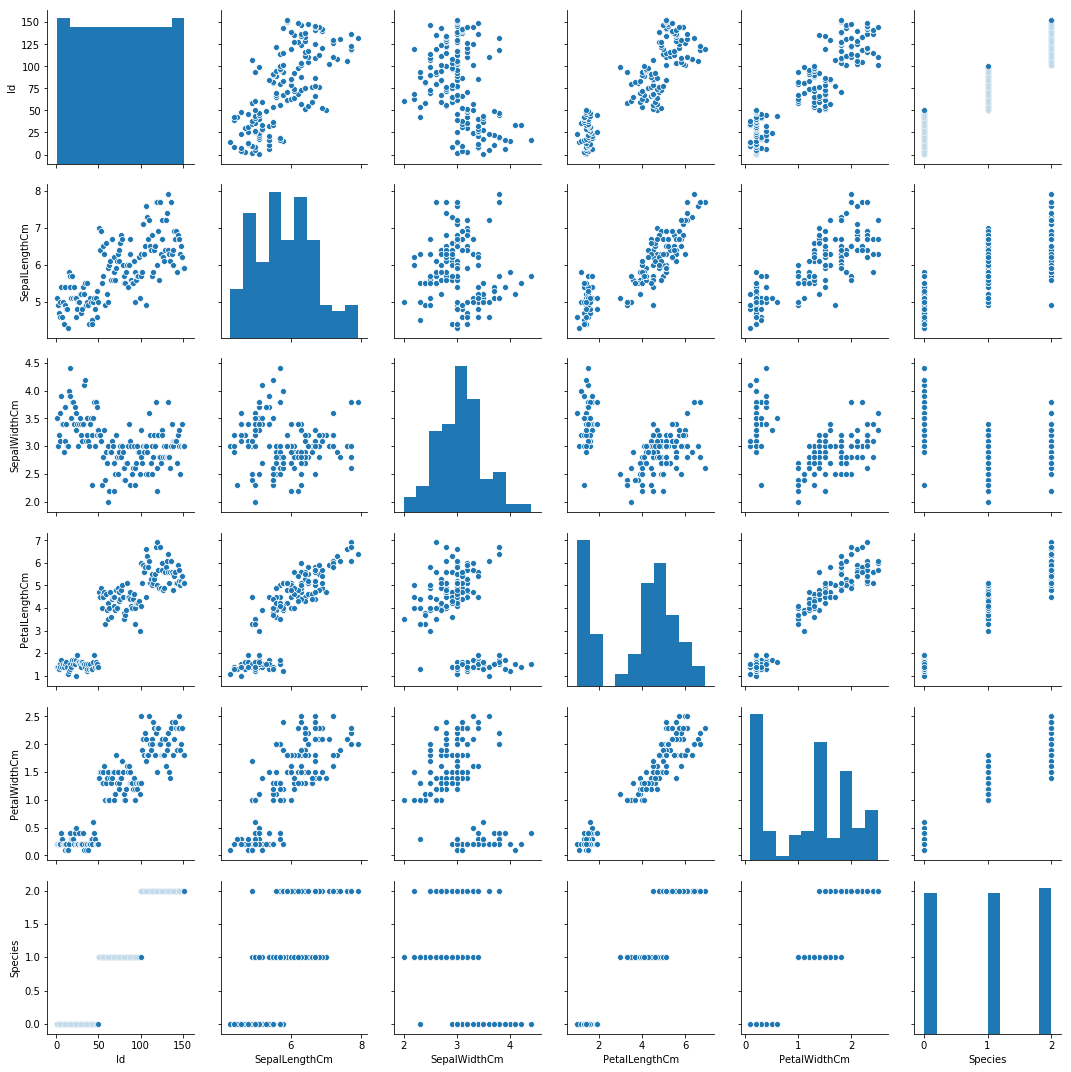

In [13]:
#pd.plotting.scatter_matrix(iris_df)
sns.pairplot(iris_df)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [14]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

iris_df_z = iris_df.apply(zscore)  # convert all attributes to Z scale 

iris_df_z.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02
mean,-3.067722e-17,1.480358e-15,-9.088125e-16,3.608225e-16,-3.505967e-17,-2.921640e-18
std,1.003306e+00,1.003306e+00,1.003306e+00,1.003306e+00,1.003306e+00,1.003306e+00
min,-1.720693e+00,-1.883301e+00,-2.453286e+00,-1.583213e+00,-1.458534e+00,-1.236958e+00
25%,-8.603465e-01,-9.075471e-01,-5.899533e-01,-1.241059e+00,-1.194922e+00,-1.236958e+00
50%,0.000000e+00,-5.376274e-02,-1.241200e-01,3.556603e-01,1.231342e-01,-1.606439e-02
75%,8.603465e-01,6.780525e-01,5.746298e-01,7.548401e-01,7.821626e-01,1.204829e+00
max,1.720693e+00,2.507590e+00,3.136713e+00,1.781303e+00,1.704802e+00,1.204829e+00


In [15]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

iris_lables = iris_df["Species"]

In [16]:
# store the normalized features data into np array 

X = np.array(iris_df_z)
X.shape

(152, 6)

In [17]:
# store the bc_labels data into a separate np array

y = np.array(iris_lables)
y.shape

(152,)

In [18]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Build Model

In [19]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [20]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [21]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

1.0

In [22]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')

In [23]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [24]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

1.0

In [25]:
NNH = KNeighborsClassifier(n_neighbors= 9, weights = 'distance')

In [26]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [27]:
# For every test data point, predict it's label based on 9 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

1.0

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Misclassification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [28]:
error = []

# Calculating error for K values between 1 and 19
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    AS = knn.score(X_test, y_test)
    #error.append(np.mean(pred_i != y_test))
    error.append(1-AS)

In [29]:
error

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [30]:
print("Every K value is giving utmost accuracy")

Every K value is giving utmost accuracy


## Plot accuracy

### Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0,0.5,'Mean Error')

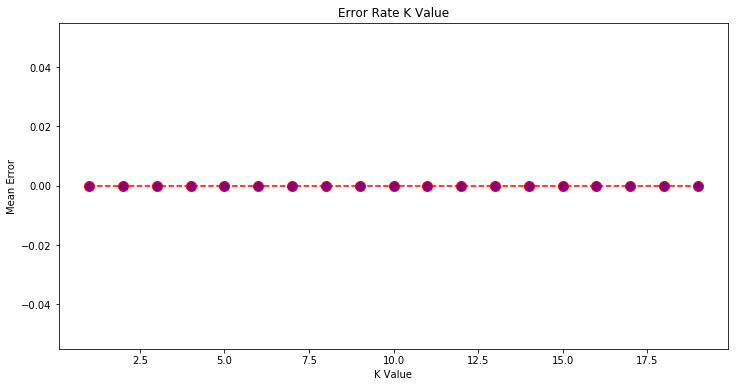

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='purple', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')